In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta

C:\Users\westm\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\westm\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
def days_calc(year, month, day):
  # Get today's date
  today = datetime.today()

  # Define the target date
  target_date = datetime(year, month, day)

  # Calculate the difference in days
  delta = target_date - today

  # Number of days
  T_days = delta.days
  return(T_days)

In [4]:
def black_scholes(name, K, T_days, r, option_type='call', show_volatility=False, show_price=False, over_write_price=0, over_write_sigma = 0):
    end_date = datetime.today()
    start_date = end_date - relativedelta(years=5)
    data = yf.download(name, start_date, end_date)
    S = data["Close"].iloc[-1]
    if over_write_price > 0:
      S = over_write_price

    if show_price:
        plt.figure(figsize=(10, 6))
        plt.plot(data["Close"], label='Price', color='black')
        plt.title(f'{name} prices')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid(True)
        plt.show()
        print("S is:", S)

    log_returns = np.log(data["Close"] / data["Close"].shift(1))
    data.index = pd.to_datetime(data.index)
    weekly_volatility = log_returns.resample('W').std() * np.sqrt(252)
    monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
    sigma = monthly_volatility.iloc[-1]

    if show_volatility:
        plt.figure(figsize=(14, 7))

        plt.subplot(2, 1, 1)
        plt.plot(monthly_volatility, label='Monthly Price Volatility (Annualized)', color='blue')
        plt.title('Monthly Price Volatility')
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(weekly_volatility, label='Weekly Price Volatility (Annualized)', color='green')
        plt.title('Weekly Price Volatility')
        plt.legend()

        plt.tight_layout()
        plt.show()
        print("Last monthly running volatility:", monthly_volatility.iloc[-1])
        print("Last weekly running volatility:", weekly_volatility.iloc[-1])
        print("Sigma is:", sigma)

    if over_write_sigma > 0:
        sigma = over_write_sigma
    T = T_days / 365  # Convert time to expiration from days to years

    def option_price(K):
        d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        if option_type == 'call':
            return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        elif option_type == 'put':
            return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        else:
            raise ValueError("Option type must be 'call' or 'put'")
    if show_volatility == False and show_price == False:
      return [option_price(k) for k in K]

In [5]:
name = "BFIT.AS"
K = [10, 12, 13, 14, 15, 15.50, 16, 16.50, 17, 17.50, 18, 18.50, 19, 19.50, 20, 20.50, 21, 21.50, 22, 23, 23.5, 25, 26, 28]
T_days = days_calc(2024,10,18)
r = 0.0375
call_prices = black_scholes(name, K, T_days, r, option_type="call")
put_prices = black_scholes(name, K, T_days, r, option_type="put")

df = pd.DataFrame({
    'Strike Price': K,
    'Option Call Price': round(pd.Series(call_prices),2),
    'Option Put Price': round(pd.Series(put_prices),2)
})
print()
print("18OKT24")
print(df)

C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


18OKT24
    Strike Price  Option Call Price  Option Put Price
0           10.0              12.98              0.00
1           12.0              10.98              0.00
2           13.0               9.99              0.00
3           14.0               8.99              0.00
4           15.0               7.99              0.00
5           15.5               7.49              0.00
6           16.0               6.99              0.00
7           16.5               6.49              0.00
8           17.0               5.99              0.00
9           17.5               5.49              0.00
10          18.0               5.00              0.00
11          18.5               4.50              0.00
12          19.0               4.00              0.00
13          19.5               3.50              0.00
14          20.0               3.01              0.01
15          20.5               2.52              0.02
16          21.0               2.06              0.06
17          21.5   


C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)


C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M

[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex 

[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex 

C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volatility = log_returns.resample('M').std() * np.sqrt(252)
C:\Users\westm\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\westm\AppData\Local\Temp\ipykernel_48260\3734997415.py:23: FutureWarning: 'M

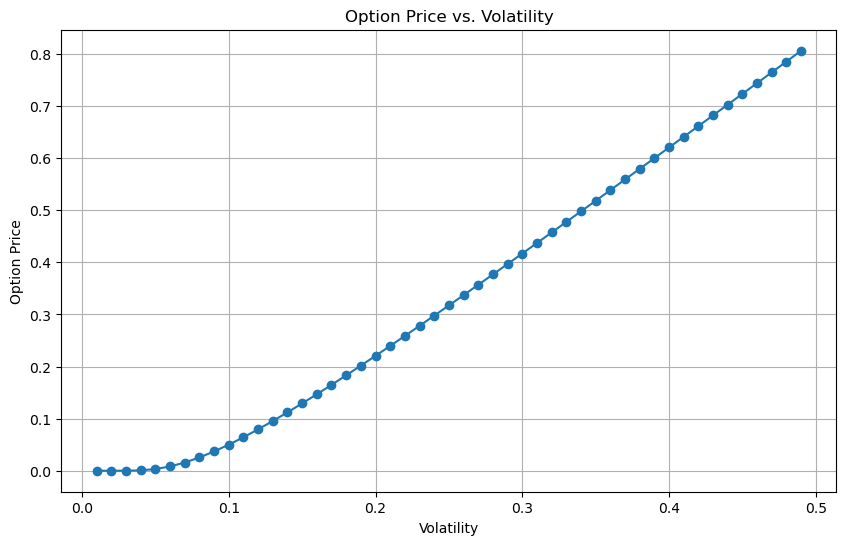

In [6]:
# Initialize variables
volatility_range = np.arange(0.01, 0.5, 0.01)
theta = []

# Compute option prices for different volatilities
for sigma in volatility_range:
    price = black_scholes(name, [23.5], T_days, r, option_type="call", over_write_sigma=sigma)
    theta.append(price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(volatility_range, theta, marker='o')
plt.xlabel('Volatility')
plt.ylabel('Option Price')
plt.title('Option Price vs. Volatility')
plt.grid(True)
plt.show()

